# RQ#2 - Haseeb & Aayusha

In [1]:
import pandas as pd  

df = pd.read_csv('./datasets/final-dataset.csv')  
display(df)

,repo,stars,forks,pull_requests,pScore,pScore_normalized,popular,s_num_nodes,s_weighted_mean_degree,s_num_component,...,t_num_dev_nodes,t_num_file_nodes,t_num_dev_per_file,t_num_file_per_dev,t_graph_density,proj_name,month,st_num_dev,t_net_overlap,s_net_overlap
0,echarts,62125,19696,30,82721,1.000000,1,4,5.000000,1,...,4,535,1.220561,163.250000,0.305140,echarts,0,0,0.000000,0.000000
1,echarts,62125,19696,30,82721,1.000000,1,5,4.800000,2,...,4,414,1.881643,194.750000,0.470411,echarts,1,0,0.064156,0.000000
2,echarts,62125,19696,30,82721,1.000000,1,6,9.333333,1,...,3,606,1.110561,224.333333,0.370187,echarts,2,0,0.017894,0.222222
3,echarts,62125,19696,30,82721,1.000000,1,8,28.000000,1,...,2,510,1.039216,265.000000,0.519608,echarts,3,0,0.025705,0.250000
4,echarts,62125,19696,30,82721,1.000000,1,7,11.428571,1,...,3,60,1.500000,30.000000,0.500000,echarts,4,0,0.057878,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,amaterasu,0,1,0,1,0.000012,0,3,4.000000,1,...,0,0,0.000000,0.000000,0.000000,amaterasu,19,0,0.000000,0.200000
5507,amaterasu,0,1,0,1,0.000012,0,0,0.000000,0,...,2,46,1.043478,24.000000,0.521739,amaterasu,20,0,0.000000,0.000000
5508,amaterasu,0,1,0,1,0.000012,0,3,5.333333,1,...,1,3,1.000000,3.000000,1.000000,amaterasu,21,0,0.000000,0.000000
5509,amaterasu,0,1,0,1,0.000012,0,2,2.000000,1,...,0,0,0.000000,0.000000,0.000000,amaterasu,22,0,0.000000,0.000000


<Figure size 1500x1000 with 0 Axes>

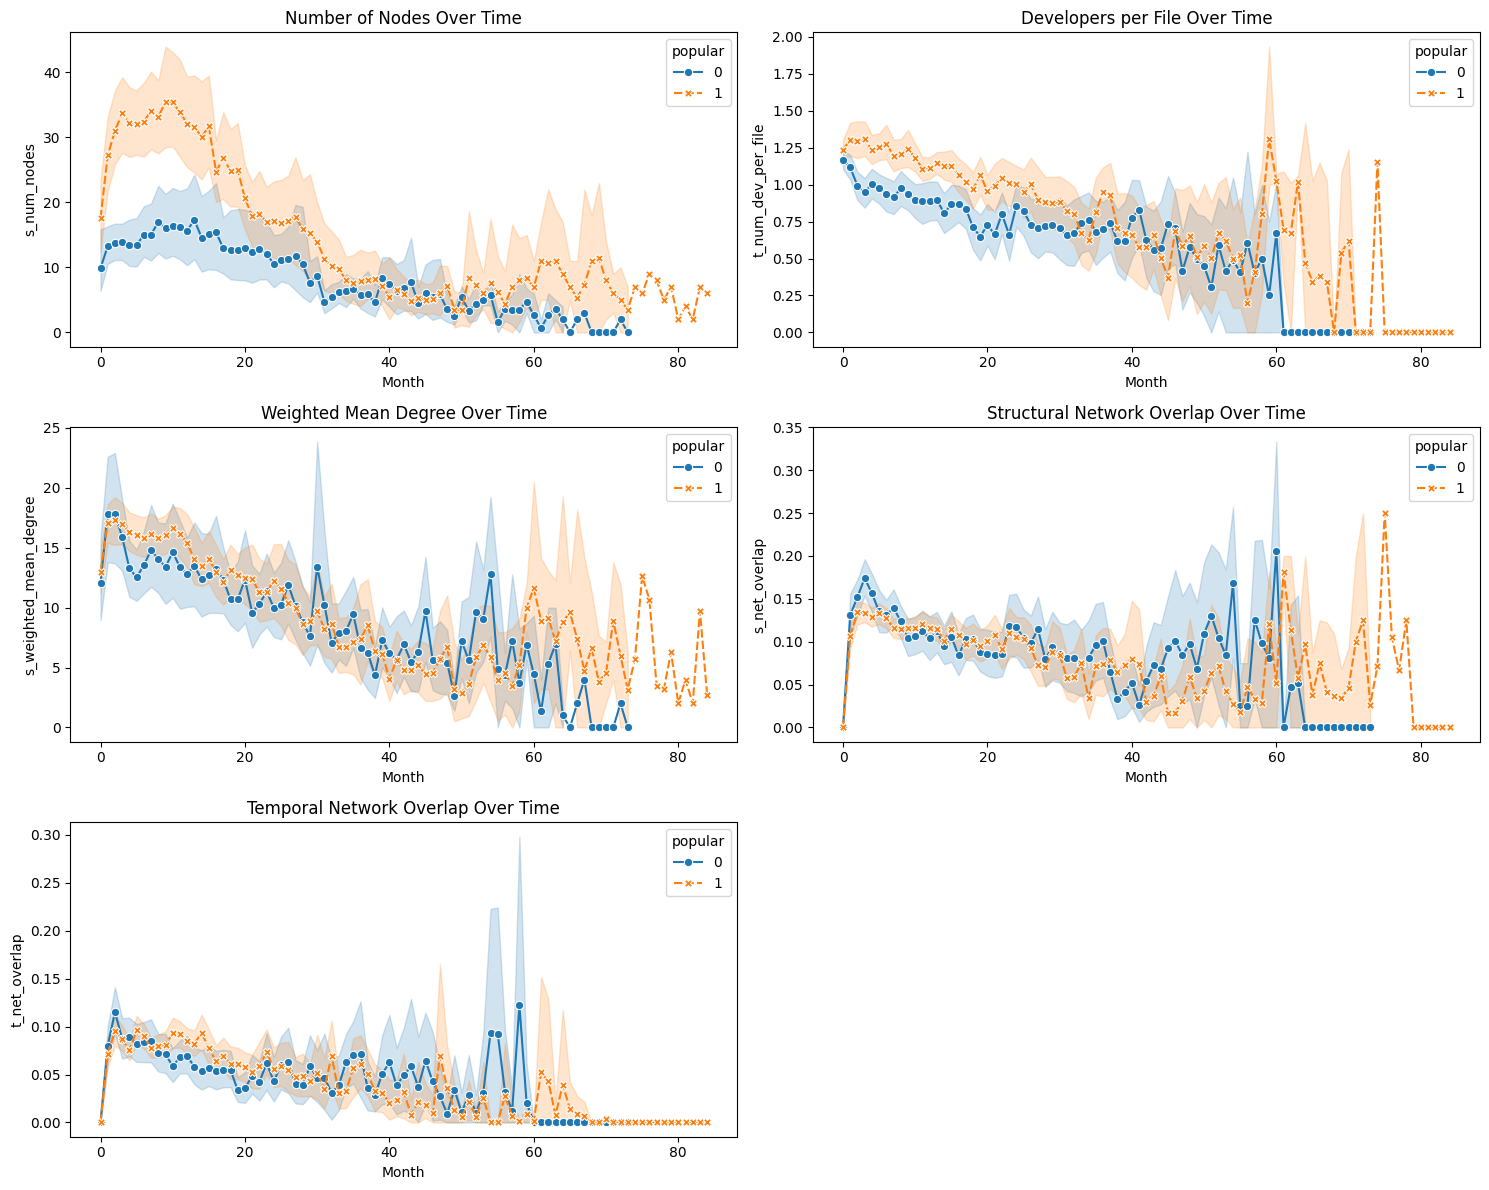

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']
titles = ["Number of Nodes Over Time", "Developers per File Over Time",
          "Weighted Mean Degree Over Time", "Structural Network Overlap Over Time", "Temporal Network Overlap Over Time"]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df, x='month', y=metric, hue='popular', style='popular', markers=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Month")
    ax.set_ylabel(metric)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

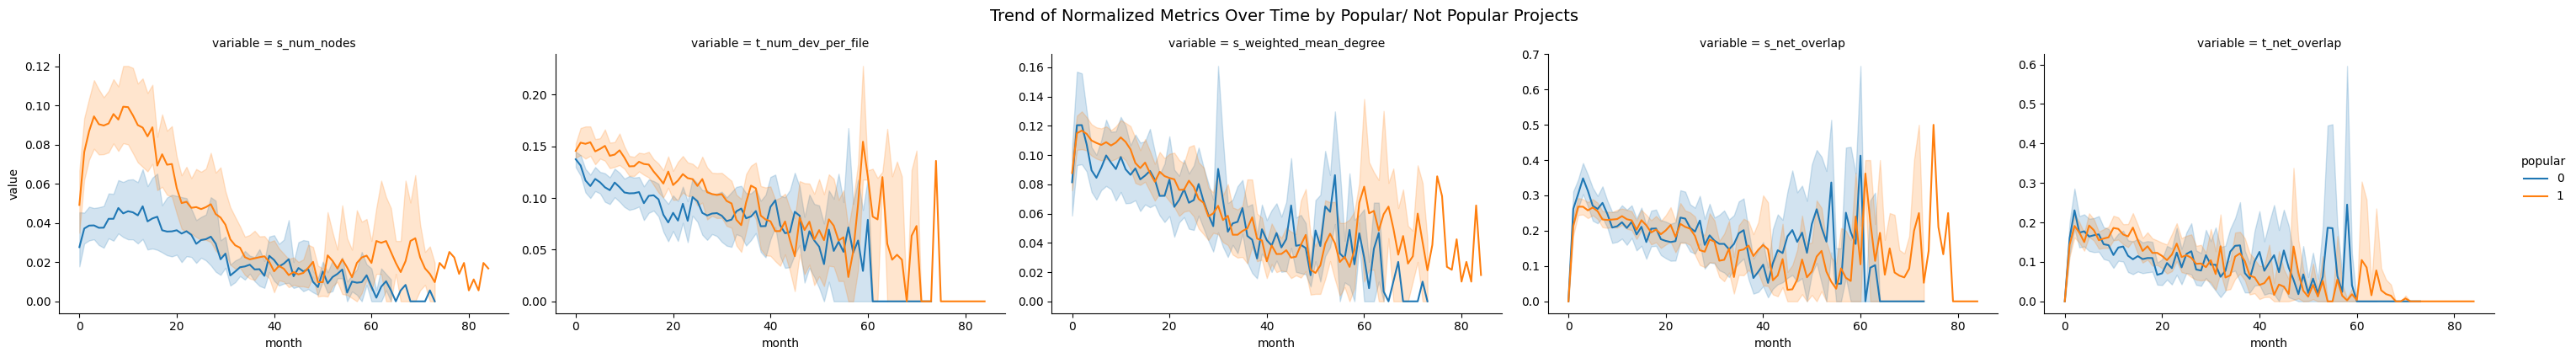

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']

scaler = MinMaxScaler()
df[metrics] = scaler.fit_transform(df[metrics])

g = sns.FacetGrid(df.melt(id_vars=['month', 'popular'], value_vars=metrics), col="variable", hue="popular", height=4, aspect=1.5, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="month", y="value")
g.add_legend()
plt.suptitle("Trend of Normalized Metrics Over Time by Popular/ Not Popular Projects", y=1.05, fontsize=14)
plt.show()


Correlation Matrix:
                        s_num_nodes  t_num_dev_per_file  \
s_num_nodes                1.000000            0.335958   
t_num_dev_per_file         0.335958            1.000000   
s_weighted_mean_degree     0.422879            0.457420   
s_net_overlap              0.054847            0.422157   
t_net_overlap              0.152351            0.551028   
popular                    0.228657            0.352582   

                        s_weighted_mean_degree  s_net_overlap  t_net_overlap  \
s_num_nodes                           0.422879       0.054847       0.152351   
t_num_dev_per_file                    0.457420       0.422157       0.551028   
s_weighted_mean_degree                1.000000       0.739923       0.420770   
s_net_overlap                         0.739923       1.000000       0.479252   
t_net_overlap                         0.420770       0.479252       1.000000   
popular                               0.129172       0.064912       0.176640   

    

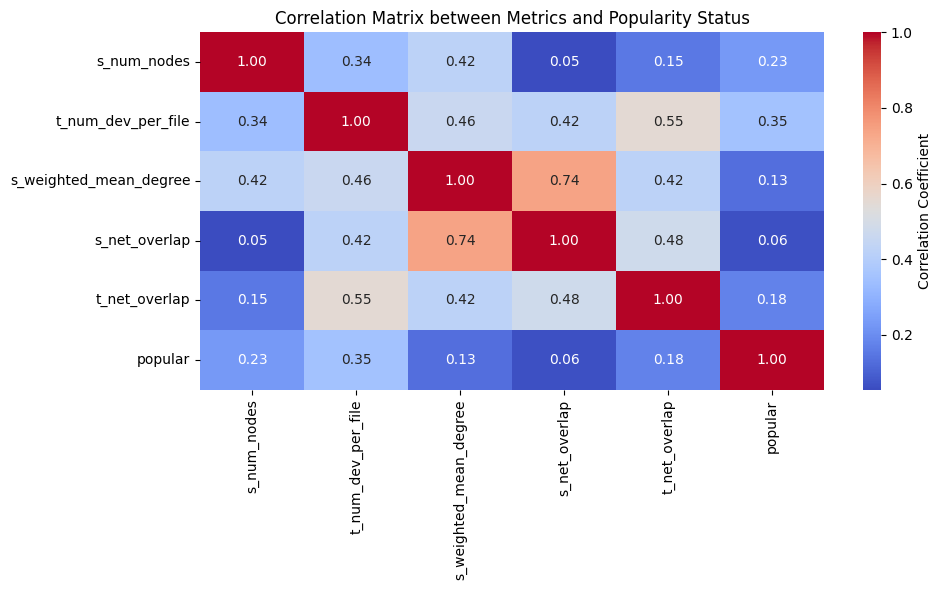

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Load dataset
df = pd.read_csv('./datasets/final-dataset.csv')

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], errors='coerce')

# Ensure numeric conversion
numeric_columns = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                   's_net_overlap', 't_net_overlap', 'popular']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort and apply rolling mean
ROLLING_WINDOW = 13
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month')[numeric_columns].mean().reset_index()

# Aggregate by project
aggregated_df = df_rolling.groupby('proj_name')[numeric_columns].mean().reset_index()

# Clean NaNs and infinite values
aggregated_df.replace([np.inf, -np.inf], np.nan, inplace=True)
aggregated_df.dropna(inplace=True)

# Display aggregated data preview
# print("\nAggregated DataFrame (first 5 rows):")
# print(aggregated_df.head())

# Correlation matrix
corr_matrix = aggregated_df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Pearson correlation coefficients and p-values
# print("\nPearson Correlation Coefficients with Popularity:")
for col in numeric_columns:
    if col != 'popular':
        corr, pval = pearsonr(aggregated_df[col], aggregated_df['popular'])
        # print(f"{col:30} -> Pearson Corr: {corr:.3f}, P-Value: {pval:.4f}")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix between Metrics and Popularity Status')
plt.tight_layout()
plt.show()


In [ ]:
# #RQ2 -BOX PLOT

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ROLLING_WINDOW = 12
df['month'] = pd.to_datetime(df['month'])
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month').mean().reset_index()
aggregated_df = df_rolling.groupby('proj_name').agg({
    's_num_nodes': 'mean',
    't_num_dev_per_file': 'mean',
    's_weighted_mean_degree': 'mean',
    's_net_overlap': 'mean',
    't_net_overlap': 'mean',
    'popular': 'mean'
}).reset_index()
aggregated_df['popular'] = aggregated_df['popular'].fillna(0).round().astype(int)
metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='popular', y=metric, data=aggregated_df, hue='popular', palette="coolwarm", legend=False)
    plt.xlabel("Graduation Status (0 = No, 1 = Yes)")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} vs. Graduation")
plt.tight_layout()
plt.show()

DataError: Cannot aggregate non-numeric type: object

/var/folders/33/tmt_dn957d99k_t2zvbqlw_40000gn/T/ipykernel_51345/3474813597.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popular', y=metric, data=aggregated_df, palette="coolwarm")
/var/folders/33/tmt_dn957d99k_t2zvbqlw_40000gn/T/ipykernel_51345/3474813597.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popular', y=metric, data=aggregated_df, palette="coolwarm")
/var/folders/33/tmt_dn957d99k_t2zvbqlw_40000gn/T/ipykernel_51345/3474813597.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popular', y=metric, data=aggreg

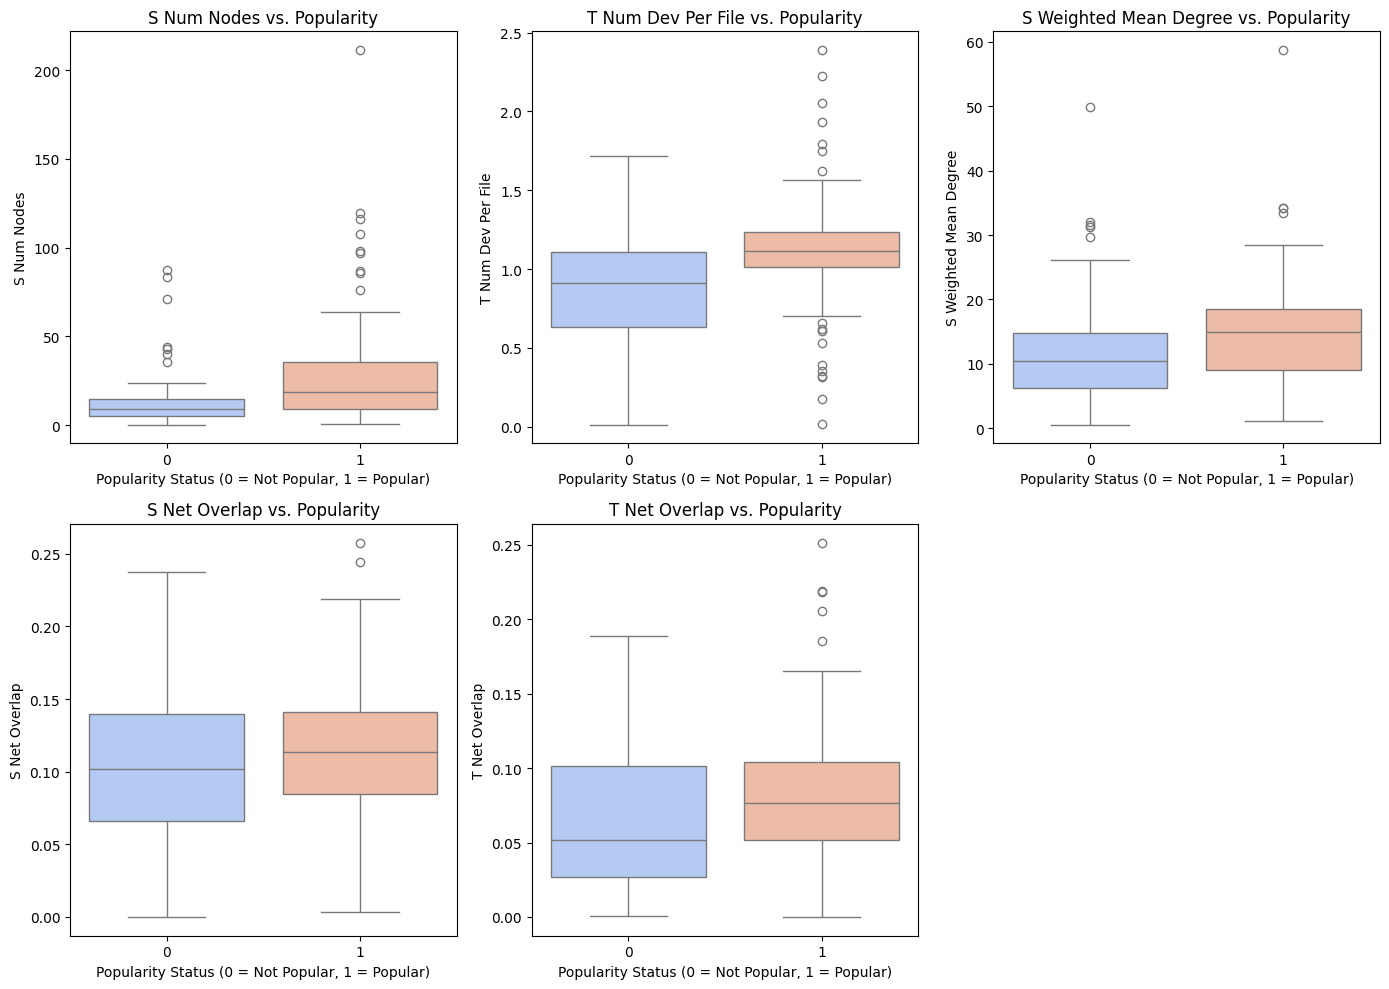

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (if not already loaded above)
df = pd.read_csv('./datasets/final-dataset.csv')

# Preprocessing
df['month'] = pd.to_datetime(df['month'], errors='coerce')
numeric_columns = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                   's_net_overlap', 't_net_overlap', 'popular']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Rolling window and aggregation
ROLLING_WINDOW = 12
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month')[numeric_columns].mean().reset_index()

aggregated_df = df_rolling.groupby('proj_name')[numeric_columns].mean().reset_index()

# Clean 'popular' column: convert it to binary for boxplot comparison
aggregated_df['popular'] = aggregated_df['popular'].fillna(0).round().astype(int)

# List of metrics to plot
metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']

# Create box plots
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='popular', y=metric, data=aggregated_df, palette="coolwarm")
    plt.xlabel("Popularity Status (0 = Not Popular, 1 = Popular)")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} vs. Popularity")
    plt.tight_layout()

plt.show()